In [22]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from dython import nominal
import missingno as msno
from pandas.plotting import table
import dataframe_image as dfi
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import pydotplus
from sklearn import tree
from sklearn.model_selection import GridSearchCV

from IPython.display import Image
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report

import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
import pydotplus
from sklearn import tree
from IPython.display import Image
import itertools
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
import os, errno
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import DBSCAN
import os
os.environ['PATH'] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_score

from IPython.display import Image
from sklearn.model_selection import train_test_split

#!pip install imbalanced-learn
import imblearn

# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
import os
os.environ['PATH'] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
import os
os.environ['PATH'] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
import math
import collections
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno

from collections import defaultdict
from scipy.stats.stats import pearsonr

from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_confusion_matrix

import pydotplus
from sklearn import tree
from IPython.display import Image



In [127]:
dfTest = pd.read_csv('C:/Users/Federico/Desktop/Data Science/Data Mining/Progetto/Classificazione/Test_HR_Employee_Attrition_New.csv') 

In [128]:
dfTrain = pd.read_csv('C:/Users/Federico/Desktop/Data Science/Data Mining/Progetto/Classificazione/Train_HR_Employee_Attrition_New.csv') 

In [129]:
label_encoders = dict()
column2encode = ["Attrition","BusinessTravel","EducationField","Gender","JobRole","MaritalStatus","OverTime"]

for col in column2encode:
    le = LabelEncoder()
    dfTrain[col] = le.fit_transform(dfTrain[col])
    dfTest[col] = le.fit_transform(dfTest[col])

    label_encoders[col] = le


In [130]:
attributes = [col for col in dfTrain.columns if col != 'Attrition']
#X_train = dfTrain[attributes].values
#y_train = dfTrain['Attrition']
X=dfTrain[attributes].values
y=dfTrain['Attrition']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)



In [131]:
attributes = [col for col in dfTest.columns if col != 'Attrition']
X_test = dfTest[attributes].values
y_test = dfTest['Attrition']

In [132]:
# summarize class distribution
counter = Counter(y_train)
print(counter)
# define pipeline
over = SMOTE(sampling_strategy=0.5)

# transform the dataset
X_train, y_train = over.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({0: 689, 1: 134})
Counter({0: 689, 1: 344})


In [133]:
# summarize class distribution
counter = Counter(y_train)
print(counter)
# define pipeline
under = RandomUnderSampler(sampling_strategy=1)

# transform the dataset
X_train, y_train = under.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({0: 689, 1: 344})
Counter({0: 344, 1: 344})


In [134]:
# Import Libraries
from sklearn.model_selection import PredefinedSplit

# Split Data to Train and Validation
#X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, stratify = y,random_state = 2020)


merged_X = np.concatenate((X_train,X_val),axis=0)
merged_y = np.concatenate((y_train,y_val),axis=0)
myValfold = []

for i in range(len(X_train)):
    myValfold.append(-1)

for i in range(len(X_val)):
    myValfold.append(0)



ps = PredefinedSplit(test_fold=myValfold)



In [135]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [136]:
param_grid = {'criterion': ['gini', 'entropy'],
              'min_samples_split' : range(5,25,5),
              'min_samples_leaf' : range(5,25,5),
              'max_depth': np.arange(2, 12)}

dt1 = GridSearchCV(DecisionTreeClassifier(class_weight="balanced"), 
                         param_grid, cv=ps, scoring='balanced_accuracy')

dt1_fit = dt1.fit(merged_X, merged_y)
report(dt1_fit.cv_results_, n_top=5)


Model with rank: 1
Mean validation score: 0.748 (std: 0.000)
Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 5}

Model with rank: 1
Mean validation score: 0.748 (std: 0.000)
Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 10}

Model with rank: 1
Mean validation score: 0.748 (std: 0.000)
Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 15}

Model with rank: 1
Mean validation score: 0.748 (std: 0.000)
Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 20}

Model with rank: 1
Mean validation score: 0.748 (std: 0.000)
Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 20, 'min_samples_split': 5}

Model with rank: 1
Mean validation score: 0.748 (std: 0.000)
Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 20, 'min_samples_split': 10}

Model with rank: 1
Mean validation s

In [137]:
clf1 = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=5, min_samples_leaf=20)
clf1 = clf1.fit(X_train, y_train)

y_pred_tr = clf1.predict(X_train)

y_pred = clf1.predict(X_val)

print('Train Accuracy %s' % accuracy_score(y_train, y_pred_tr))
print('Train F1-score %s' % f1_score(y_train, y_pred_tr, average=None))
print()

from sklearn.metrics import balanced_accuracy_score


print('Val Accuracy %0.4f' % balanced_accuracy_score(y_val, y_pred))
print('Val F1-score %0.4f' % f1_score(y_val, y_pred))
print('Val Roc_auc %0.4f' % roc_auc_score(y_val, y_pred))
print('Val Recall %0.4f' % recall_score(y_val, y_pred))
print('Val Precision %0.4f' % precision_score(y_val, y_pred))
print()
      
      
    

print(classification_report(y_val, y_pred))

confusion_matrix(y_val, y_pred)

Train Accuracy 0.8357558139534884
Train F1-score [0.84062059 0.83058471]

Val Accuracy 0.7482
Val F1-score 0.5161
Val Roc_auc 0.7482
Val Recall 0.6897
Val Precision 0.4124

              precision    recall  f1-score   support

           0       0.93      0.81      0.86       295
           1       0.41      0.69      0.52        58

    accuracy                           0.79       353
   macro avg       0.67      0.75      0.69       353
weighted avg       0.84      0.79      0.81       353



array([[238,  57],
       [ 18,  40]], dtype=int64)

Age 0.0
BusinessTravel 0.0
DistanceFromHome 0.0
Education 0.0018584531159355898
EducationField 0.0
Gender 0.0
JobRole 0.00903613499486068
MaritalStatus 0.02792891681840709
MonthlyIncome 0.0
OverTime 0.4678500973627291
PercentSalaryHike 0.008074137826594885
PerformanceRating 0.0
StockOptionLevel 0.05371816913138632
TotalWorkingYears 0.2000077825748318
TrainingTimesLastYear 0.0
YearsInCurrentRole 0.01280388390974908
ChangeCompanyRate 0.06655332034540522
Satisfaction 0.15216910392010016


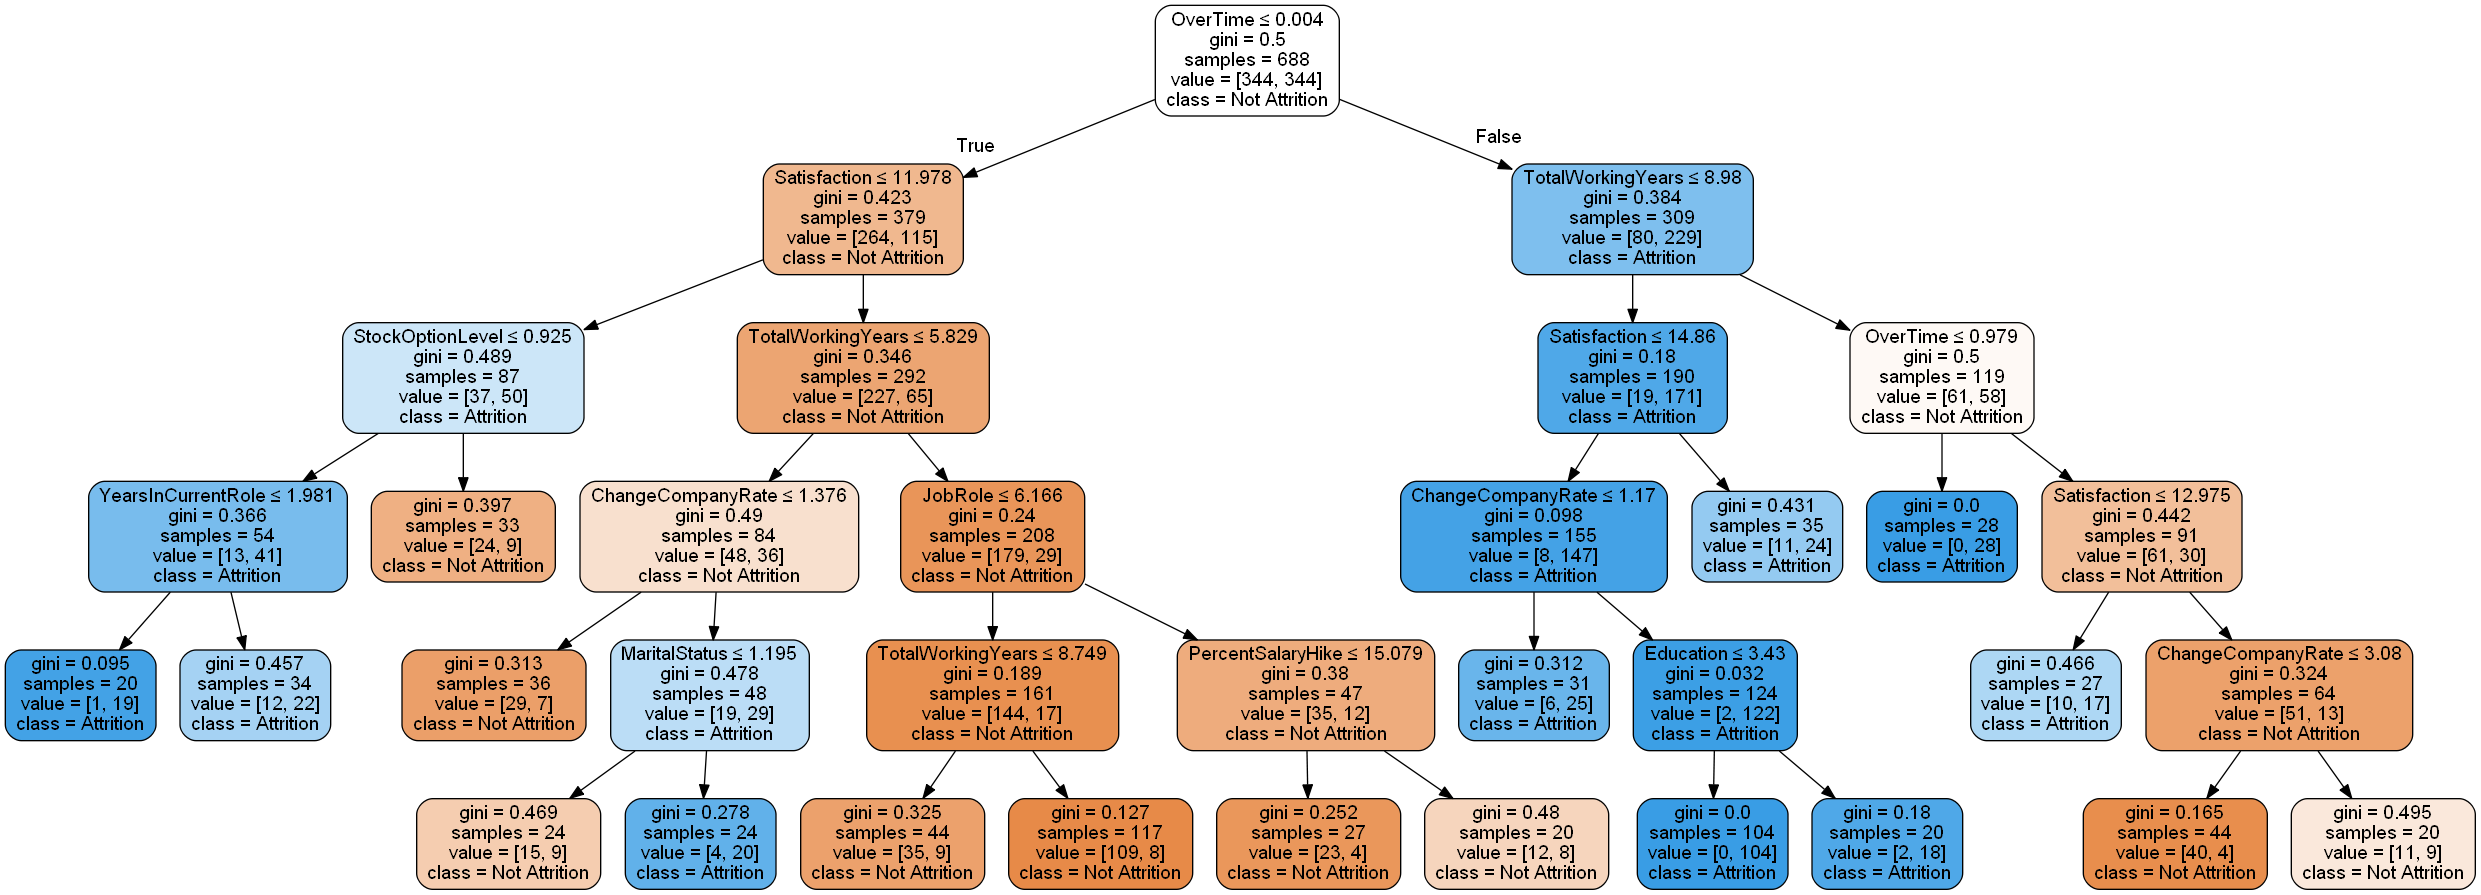

In [138]:
for col, imp in zip(attributes, clf1.feature_importances_):
    print(col, imp)
    
dot_data = tree.export_graphviz(clf1, out_file=None,
                                feature_names=attributes,
                                class_names=['Attrition' if x == 1 else 'Not Attrition' for x in clf1.classes_],  
                                filled=True, rounded=True,  
                                special_characters=True
                               )  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [139]:
y_pred_tr = clf1.predict(X_train)

y_pred = clf1.predict(X_test)

print('Train Accuracy %s' % accuracy_score(y_train, y_pred_tr))
print('Train F1-score %s' % f1_score(y_train, y_pred_tr, average=None))
print()

print('Val Accuracy %0.4f' % balanced_accuracy_score(y_test, y_pred))
print('Val F1-score %0.4f' % f1_score(y_test, y_pred))
print('Val Roc_auc %0.4f' % roc_auc_score(y_test, y_pred))
print('Val Recall %0.4f' % recall_score(y_test, y_pred))
print('Val Precision %0.4f' % precision_score(y_test, y_pred))
print()
      
      
    

print(classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)

Train Accuracy 0.8357558139534884
Train F1-score [0.84062059 0.83058471]

Val Accuracy 0.7186
Val F1-score 0.4906
Val Roc_auc 0.7186
Val Recall 0.5778
Val Precision 0.4262

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       249
           1       0.43      0.58      0.49        45

    accuracy                           0.82       294
   macro avg       0.67      0.72      0.69       294
weighted avg       0.84      0.82      0.83       294



array([[214,  35],
       [ 19,  26]], dtype=int64)

0.7186077643908969


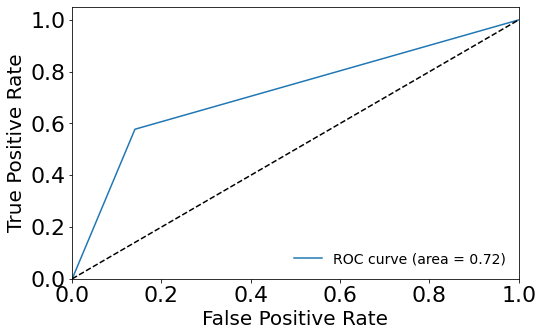

In [140]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc_auc = roc_auc_score(y_test, y_pred, average=None)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

In [141]:


#scores = cross_val_score(clf1, X, y, cv=StratifiedKFold(15),scoring='balanced_accuracy')
#print('Balanced_Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

#scores = cross_val_score(clf1, X, y, cv=StratifiedKFold(15), scoring='f1')
#print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))


#scores = cross_val_score(clf1, X, y, cv=StratifiedKFold(15), scoring='roc_auc')
#print('Roc_auc: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

#scores = cross_val_score(clf1, X, y, cv=StratifiedKFold(15), scoring='recall')
#print('Recall: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

#scores = cross_val_score(clf1, X, y, cv=StratifiedKFold(15), scoring='precision')
#print('Precision: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))